# ADA final exam dry run (Fall 2021)

In [1]:
import sys
try:
    assert 'adaexam' in sys.executable
except AssertionError:
    print('Seems the adaexam conda environment is not your active environment!')
    raise

print(f'Python path: {sys.executable}')

Python path: C:\Users\user\anaconda3\envs\adaexam\python.exe


In [3]:
'''Download spacy en_core_web_sm model'''
!python -m spacy download en_core_web_sm

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.2.0/en_core_web_sm-3.2.0-py3-none-any.whl (13.9 MB)
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [4]:
''' Package import test '''
import os
import gzip
import random
import pickle
import re
import itertools
import collections
import operator
import requests
from urllib.parse import *
from datetime import *
from dateutil.parser import parse

import math
import sklearn
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import *

import ast
import gensim
import string
import nltk
import codecs
import json
import vaderSentiment
import spacy
from empath import Empath
from bs4 import BeautifulSoup

import networkx as nx

from IPython.display import Image
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

print("Package import test successful!")

Package import test successful!


### Prepare some print samples

In [143]:
# Note: Use %d for decimals/integers, 
# %f for floats (alternatively 
# %.xf to specify a precision of x), 
# and %s for strings

num_of_apples = 5
num_of_bananas = 3
A_GPA = 4.3
B_GPA = 4.0
print("There are %d apples on the table." % (num_off_apples))
print("A's GPA is %.2f and B's GPA is %.2f." % (A_GPA, B_GPA)) 


There are 5 apples on the table.
A's GPA is 4.30 and B's GPA is 4.00.


In [144]:
print("There were {} apples and {} bananas".format(num_of_apples, num_of_bananas))

There were 5 apples and 3 bananas


### Prepare the open file package

In [69]:
'''
 File name: test.py
 Author: ADA
 Date created: 03/10/2018
 Date last modified: 01/11/2019
 Python Version: 3.6
'''
import pandas as pd

BACTERIA_DATA = './Data_W1/microbiome.csv'
COMPRESSION = 'zip'

def format_attr(dataframe):

    '''
    Create a new dataframe with all attributes
    formatted according to the flight datasets'
    documentation (at https://....).
    :param dataframe: pandas.DataFrame
    :return: new dataframe
    '''
    
    formatted_df = pd.DataFrame()
    formatted_df['Taxon'] = df['Taxon'].astype(str)
    formatted_df['Patient'] = df['Patient'].astype(int)
    formatted_df['Group'] = df['Group'].astype(int)
    formatted_df['Tissue'] = df['Tissue'].astype(int)
    formatted_df['Stool'] = df['Stool'].astype(int)
    return formatted_df
     

if __name__ == '__main__':
    Patient = 1
    Group = 0

    # Read data from memory and clean it
    df = pd.read_csv(BACTERIA_DATA, sep = ',') #df = pd.read_csv(BACTERIA_DATA, compression=COMPRESSION)
    df = df.dropna()
    df = format_attr(df)
    
    # Hierarchical index
    df2 = pd.read_csv(BACTERIA_DATA, sep = ',', index_col = ['Patient', 'Group'])

    mb = pd.read_csv(BACTERIA_DATA, index_col=['Patient','Taxon'])
    
    
    # Getting flights for that day
    selected = df[(df['Patient'] == Patient) & (df['Group'] == Group)]
    selected = selected.sort_values('Tissue', ascending = False)
    #[['flight_id', 'dest_id']]

df2

,,Taxon,Tissue,Stool
Patient,Group,,,
1,0,Firmicutes,136,4182
2,1,Firmicutes,1174,703
3,0,Firmicutes,408,3946
4,1,Firmicutes,831,8605
5,0,Firmicutes,693,50
...,...,...,...,...
10,1,Other,203,6
11,0,Other,392,6
12,1,Other,28,25


In [23]:
DATA_PATH = './data/'
DEFAULT_ENCODING = 'UTF8'
DEFAULT_COMPRESSION = 'gzip'

# Open the file with relative paths
# with open('./files/info.txt', 'r') as file:
#     print(file.read())
    
# Read data from memory and clean it
df_bacteria = pd.read_csv('./Data_W1/microbiome.csv').dropna()
df['Taxon'] = df['Taxon'].astype(str)
df['Patient'] = df['Patient'].astype(int)
df['Group'] = df['Group'].astype(int)
df['Tissue'] = df['Tissue'].astype(int)
df['Stool'] = df['Stool'].astype(int)

df_bacteria

,Taxon,Patient,Group,Tissue,Stool
0,Firmicutes,1,0,136,4182
1,Firmicutes,2,1,1174,703
2,Firmicutes,3,0,408,3946
3,Firmicutes,4,1,831,8605
4,Firmicutes,5,0,693,50
...,...,...,...,...,...
65,Other,10,1,203,6
66,Other,11,0,392,6
67,Other,12,1,28,25
68,Other,13,0,12,22


In [185]:
df_pitchfork = pd.read_csv("./data_HW2/pitchfork.csv.gz", compression = 'gzip', sep = ',')
#df = pd.read_csv('./data/pitchfork.csv.gz', compression='gzip', sep=',', header= 0) 
df_pitchfork = df_pitchfork.drop_duplicates(subset = ['artist', 'album'], keep = 'first')

### Prepare some ways to announce variables (Series, Dictionary, dataframe, list)

<b>Series</b>

In [27]:
counts = pd.Series([632, 1638, 569, 115])
print(type(counts))
print(counts.values)
print(counts.index)
counts

<class 'pandas.core.series.Series'>
[ 632 1638  569  115]
RangeIndex(start=0, stop=4, step=1)


0     632
1    1638
2     569
3     115
dtype: int64

In [29]:
bacteria = pd.Series([22,33,44,55], index = ['apple', 'book', 'candy', 'dog'])
bacteria

apple    22
book     33
candy    44
dog      55
dtype: int64

In [30]:
bacteria[[name.endswith('og') for name in bacteria.index]]

dog    55
dtype: int64

In [32]:
bacteria.name = 'counts'
bacteria.index.name = 'phylum'
bacteria

phylum
apple    22
book     33
candy    44
dog      55
Name: counts, dtype: int64

<b>Dictionary</b>

In [52]:
bacteria_dict = {'AirPod':22,
                 'Banana': 33,
                 'Cream': 44,
                 'Dollar': 55}

bacteria_dict

{'AirPod': 22, 'Banana': 33, 'Cream': 44, 'Dollar': 55}

In [34]:
bacteria2 = pd.Series(bacteria_dict, 
                      index=['Cyanobacteria','Firmicutes',
                             'Proteobacteria','Actinobacteria'])
bacteria2

Cyanobacteria    NaN
Firmicutes       NaN
Proteobacteria   NaN
Actinobacteria   NaN
dtype: float64

<b>DataFrame</b>

In [150]:
data = pd.DataFrame({'value':[632, 1638, 569, 115, 433, 1130, 754, 555],
                     'patient':[1, 1, 1, 1, 2, 2, 2, 2],
                     'phylum':['Firmicutes', 'Proteobacteria', 'Actinobacteria', 
    'Bacteroidetes', 'Firmicutes', 'Proteobacteria', 'Actinobacteria', 'Bacteroidetes']})
data

,value,patient,phylum
0,632,1,Firmicutes
1,1638,1,Proteobacteria
2,569,1,Actinobacteria
3,115,1,Bacteroidetes
4,433,2,Firmicutes
5,1130,2,Proteobacteria
6,754,2,Actinobacteria
7,555,2,Bacteroidetes


In [151]:
# Change the order of the columns
data = data[['phylum','value','patient']]
data

,phylum,value,patient
0,Firmicutes,632,1
1,Proteobacteria,1638,1
2,Actinobacteria,569,1
3,Bacteroidetes,115,1
4,Firmicutes,433,2
5,Proteobacteria,1130,2
6,Actinobacteria,754,2
7,Bacteroidetes,555,2


In [49]:
print(data.value)
type(data.value)

0     632
1    1638
2     569
3     115
4     433
5    1130
6     754
7     555
Name: value, dtype: int64


pandas.core.series.Series

In [51]:
print(data['patient'])
type(data['patient'])

0    1
1    1
2    1
3    1
4    2
5    2
6    2
7    2
Name: patient, dtype: int64


pandas.core.series.Series

In [56]:
print(type(data[['value']]))
data[['patient']]

<class 'pandas.core.frame.DataFrame'>


,patient
0,1
1,1
2,1
3,1
4,2
5,2
6,2
7,2


<b>list</b>

In [180]:
# Convert lst_2015 into a dataframe
lst = [[1,2,3,4,5,6],['a','b','c','d','e','f']]
display(lst)
test_df = pd.DataFrame(lst)
display(test_df)
transposed_test_df = test_df.transpose()
display(transposed_test_df)

[[1, 2, 3, 4, 5, 6], ['a', 'b', 'c', 'd', 'e', 'f']]

,0,1,2,3,4,5
0,1,2,3,4,5,6
1,a,b,c,d,e,f


,0,1
0,1,a
1,2,b
2,3,c
3,4,d
4,5,e
5,6,f


### Prepare some ways to manipulate data

In [38]:
# True or false on NaN or Null
bacteria2.isnull()

Cyanobacteria     True
Firmicutes        True
Proteobacteria    True
Actinobacteria    True
dtype: bool

In [57]:
data[data['phylum'].apply(lambda x: x.endswith('bacteria')) & data['value'].apply(lambda x: x>1000)]

,phylum,value,patient
1,Proteobacteria,1638,1
5,Proteobacteria,1130,2


Find the location of the rows in the dataframe 

In [79]:
data2 = data
data2.set_index('phylum', inplace = True)
data2

,value,patient
phylum,,
Firmicutes,632,1
Proteobacteria,1638,1
Actinobacteria,569,1
Bacteroidetes,115,1
Firmicutes,433,2
Proteobacteria,1130,2
Actinobacteria,754,2
Bacteroidetes,555,2


In [83]:
data2.loc['Proteobacteria', ['value']]

,value
phylum,
Proteobacteria,1638
Proteobacteria,1130


In [93]:
data.iloc[:3, 0:3]

,phylum,value,patient
0,Firmicutes,632,1
1,Proteobacteria,1638,1
2,Actinobacteria,569,1


In [103]:
Proteobacteria = data.loc[data.phylum=='Proteobacteria', ['phylum','value', 'patient']]
Proteobacteria


,phylum,value,patient
1,Proteobacteria,1638,1
5,Proteobacteria,1130,2


<b>Manipulate duplicate</b>

In [154]:
data

,phylum,value,patient
0,Firmicutes,632,1
1,Proteobacteria,1638,1
2,Actinobacteria,569,1
3,Bacteroidetes,115,1
4,Firmicutes,433,2
5,Proteobacteria,1130,2
6,Actinobacteria,754,2
7,Bacteroidetes,555,2


In [155]:
data_grouped = data.groupby(data.phylum)
data_grouped.agg(["mean", "sum"])
# use '.add_suffix('_mean')' to add suffix when announcing a new dataframe

value       patient    
                  mean   sum    mean sum
phylum                                  
Actinobacteria   661.5  1323     1.5   3
Bacteroidetes    335.0   670     1.5   3
Firmicutes       532.5  1065     1.5   3
Proteobacteria  1384.0  2768     1.5   3

In [147]:
num_duplicates = len(data[data.duplicated(subset=['phylum'])])
num_duplicates

print("There were {} duplicated rows".format(num_duplicates))

# Removes duplicated rows
data = data.drop_duplicates(subset=["phylum"], keep="first")
data

There were 0 duplicated rows


,phylum,value,patient
0,Firmicutes,632,1
1,Proteobacteria,1638,1
2,Actinobacteria,569,1
3,Bacteroidetes,115,1


In [ ]:
df_b2000 = df[df["releaseyear"]<=2000]

In [158]:
z1 = np.abs(stats.zscore(data['value']))
display(data.value.describe())
display(data[z1 > 1]) # only VERY EXTREME outliers

count       8.000000
mean      728.250000
std       465.617792
min       115.000000
25%       524.500000
50%       600.500000
75%       848.000000
max      1638.000000
Name: value, dtype: float64

,phylum,value,patient
1,Proteobacteria,1638,1
3,Bacteroidetes,115,1


### Summarize

In [111]:
baseball = pd.read_csv('./Data_W1/baseball.csv').dropna()
baseball

,id,player,year,stint,team,lg,g,ab,r,h,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
0,88641,womacto01,2006,2,CHN,NL,19,50,6,14,...,2,1,1,4,4,0,0,3,0,0
1,88643,schilcu01,2006,1,BOS,AL,31,2,0,1,...,0,0,0,0,1,0,0,0,0,0
2,88645,myersmi01,2006,1,NYA,AL,62,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,88649,helliri01,2006,1,MIL,NL,20,3,0,0,...,0,0,0,0,2,0,0,0,0,0
4,88650,johnsra05,2006,1,NYA,AL,33,6,0,1,...,0,0,0,0,4,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,89525,benitar01,2007,2,FLO,NL,34,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,89526,benitar01,2007,1,SFN,NL,19,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,89530,ausmubr01,2007,1,HOU,NL,117,349,38,82,...,25,6,1,37,74,3,6,4,1,11
98,89533,aloumo01,2007,1,NYN,NL,87,328,51,112,...,49,3,0,27,30,5,2,0,3,13


In [121]:
baseball[['id', 'player', 'hr', 'X2b']]

# the covariance across two columns
baseball.hr.cov(baseball.X2b)

69.07646464646454

In [117]:
# the correlation across two columns
baseball.hr.corr(baseball.X2b)

0.7790615182539742

Last digit

In [177]:
last_digit_in_g = baseball['g'].astype(str).str[-1:].astype(int)
grouped = last_digit_in_g.groupby(last_digit_in_g.values)
plt.bar(hrouped.index, grouped.condition, color ='blue',
        width = 0.5)
plt.xticks([0,1,2,3,4,5,6,7,8,9])
plt.xlabel("Number of motorcycles per policy", fontsize = 12)
plt.ylabel("Number of policies", fontsize = 12)
plt.title("Fig 1: Distribution of Motorcycles per Policy", fontsize = 12)
plt.show()
#plt.yscale("log")
#plt.ylim([100, 10000])
# plt.ylabel('Count')    
# plt.xlabel('baseball_g last one digit')
# plt.title("Distribution of the baseball_g's last one digit")
# plt.show()


0     9
1     1
2     2
3     0
4     3
5     9
6     3
7     8
8     5
9     0
10    0
11    3
12    3
13    8
14    7
15    8
16    0
17    7
18    2
19    7
20    8
21    1
22    5
23    6
24    1
25    4
26    3
27    4
28    0
29    5
30    2
32    6
34    6
35    7
36    5
37    2
38    4
41    1
42    8
43    6
44    1
45    4
47    9
52    5
53    6
54    2
61    4
75    9
76    9
82    7
Name: g, dtype: int32

### Joining & Mering dataframe

In [134]:
df_1 = pd.DataFrame(dict(id=range(4), age=np.random.randint(18, 31, size=4)))
df_2 = pd.DataFrame(dict(id=list(range(3))+list(range(3)), 
                        score=np.random.random(size=6)))

df_1

,id,age
0,0,27
1,1,20
2,2,20
3,3,25


In [135]:
df_2

,id,score
0,0,0.303093
1,1,0.599329
2,2,0.544206
3,0,0.341556
4,1,0.675235
5,2,0.405484


In [136]:
pd.merge(df_1, df_2, how='outer')

,id,age,score
0,0,27,0.303093
1,0,27,0.341556
2,1,20,0.599329
3,1,20,0.675235
4,2,20,0.544206
5,2,20,0.405484
6,3,25,NaN


<b> Manipulate dataframe </b>

In [ ]:
# get_dummies 

<b>Groupby</b>

In [246]:

tt=pitchfork.groupby('artist').size()
tt

artist
 Gia Margaret                                    1
 JPEGMAFIA                                       1
!!!                                              8
(Sandy) Alex G                                   2
...And You Will Know Us by the Trail of Dead    11
                                                ..
Âme                                              2
Çaykh                                            1
Ólafur Arnalds                                   4
Ólöf Arnalds                                     1
тпсб                                             1
Length: 7892, dtype: int64

In [ ]:
#cumcount: number the group from 0 to the length of the group-1
df_filter['album_number']= df_filter.groupby('artist').cumcount()

In [ ]:
# show one of the artists
df_filter.groupby('artist').get_group('Mavis Staples')

In [ ]:
# Value_replacement

### Prepare some drawing package 

<b> Scatter Plot</b>

<AxesSubplot:xlabel='hr', ylabel='X2b'>

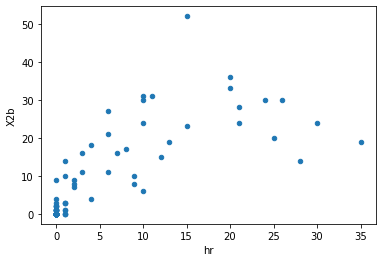

In [118]:
baseball.plot.scatter(x='hr', y='X2b')

<b>Histogram</b>

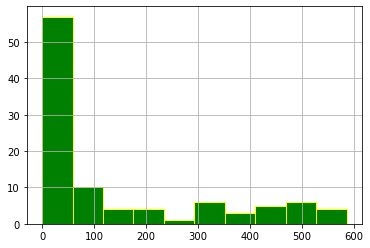

In [125]:
baseball['ab'].hist(bins=10, edgecolor="yellow", color="green")
plt.show()

In [137]:
#baseball.ab.apply(np.log).hist(bins=5)

In [120]:
baseball['ab'].describe()

count    100.000000
mean     136.540000
std      181.936853
min        0.000000
25%        2.000000
50%       40.500000
75%      243.750000
max      586.000000
Name: ab, dtype: float64

<b>Boxplot</b>

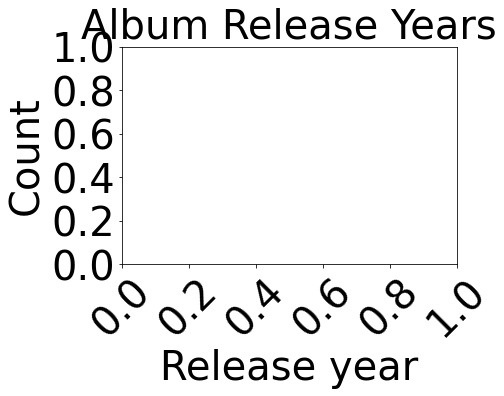

In [159]:
df = pd.read_csv('./data_HW2/pitchfork.csv.gz', compression='gzip', sep=',', header= 0) 
# Select and remove duplicate rows except first occurrence in the dataframe
df.drop_duplicates(subset = ['artist', 'album'], keep = 'first', inplace = True, ignore_index = True)

df.head(100)

plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.xlabel("Release year",size=40)
plt.ylabel("Count",size=40)
plt.title("Album Release Years",size=40)
plt.xticks(rotation=45)
plt.show()

<b>Barplot</b>

In [ ]:
# Task 3.3

# Case1: Groupby motorcycle_count and plot barplot
tsv_read_copy_grouped__motorcycle_count = tsv_read_copy.groupby(tsv_read_copy.motorcycle_count)
number_of_motorcycles_per_policy = tsv_read_copy_grouped__motorcycle_count.agg('count').head()

fig = plt.figure(figsize = (8, 5))
 
# creating the bar plot
plt.bar(number_of_motorcycles_per_policy.index, number_of_motorcycles_per_policy.condition, color ='blue',
        width = 0.5)
plt.xticks([1, 2, 3, 4])
plt.xlabel("Number of motorcycles per policy", fontsize = 12)
plt.ylabel("Number of policies", fontsize = 12)
plt.title("Fig 1: Distribution of Motorcycles per Policy", fontsize = 12)
plt.show()

In [ ]:

sns.countplot(x="motorcycle_count", data=df)
plt.yscale("log")

In [186]:
df_pitchfork

,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Studio 1,Studio 1,Andy Battaglia,8.5,2009.0,February 18 2009,Studio,Electronic,0.511917,0.499667,5.250000,-5.626583,0.031983,0.724917,0.024493,0.165367,0.555083,101.395167
1,John Fahey,The Great Santa Barbara Oil Slick,Mark Richardson,8.2,2005.0,February 13 2005,Water,Folk/Country,0.369765,0.325412,4.470588,-19.153824,0.148624,0.647053,0.559133,0.527782,0.179465,107.622647
2,Reigning Sound,Too Much Guitar,Stephen M. Deusner,8.3,2004.0,August 19 2004,In the Red,Electronic,0.253943,0.912857,4.428571,-1.089500,0.055500,0.000253,0.751214,0.199071,0.552786,133.895500
3,The Red Thread,After the Last,Chris Dahlen,7.3,2003.0,July 17 2003,Badman,Rock,0.425400,0.433474,5.700000,-12.871000,0.028260,0.310325,0.224137,0.125150,0.451400,104.354200
4,Mac Miller,Swimming,Evan Rytlewski,7.5,2018.0,August 3 2018,Warner Bros.,Rap,0.624846,0.438154,4.153846,-9.456077,0.170246,0.652462,0.012819,0.121131,0.281138,122.121308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16772,Flying Lotus,Flamagra,Philip Sherburne,7.8,2019.0,May 24 2019,none,Electronic,0.536750,0.652050,5.350000,-8.583750,0.134820,0.215916,0.519892,0.192075,0.353705,124.988200
16773,YG,4REAL 4REAL,Sheldon Pearce,7.2,2019.0,May 24 2019,none,Rap,0.815429,0.556929,4.785714,-6.327643,0.259721,0.186476,0.000848,0.244586,0.361850,115.455857
16774,Mavis Staples,We Get By,Stephen M. Deusner,7.5,2019.0,May 24 2019,none,Pop/R&B,0.633636,0.374664,5.454545,-10.363000,0.071664,0.710727,0.001982,0.118609,0.619364,114.246818
16775,Amyl and the Sniffers,Amyl and the Sniffers,Stephen Thomas Erlewine,7.2,2019.0,May 24 2019,none,Rock,0.440909,0.876636,5.454545,-3.353182,0.064000,0.000838,0.135113,0.172718,0.591545,119.177454


In [193]:
df_pitchfork['reviewdate'] = pd.to_datetime(df_pitchfork['reviewdate'], format='%B %d %Y')
df_pitchfork['releaseyear'] = pd.to_datetime(df_pitchfork['releaseyear'], format='%Y')
df_pitchfork['releaseyear_notutc'] = df_pitchfork.releaseyear.dt.year
df_pitchfork

,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,releaseyear_notutc
0,Studio 1,Studio 1,Andy Battaglia,8.5,2009-01-01,2009-02-18,Studio,Electronic,0.511917,0.499667,5.250000,-5.626583,0.031983,0.724917,0.024493,0.165367,0.555083,101.395167,2009
1,John Fahey,The Great Santa Barbara Oil Slick,Mark Richardson,8.2,2005-01-01,2005-02-13,Water,Folk/Country,0.369765,0.325412,4.470588,-19.153824,0.148624,0.647053,0.559133,0.527782,0.179465,107.622647,2005
2,Reigning Sound,Too Much Guitar,Stephen M. Deusner,8.3,2004-01-01,2004-08-19,In the Red,Electronic,0.253943,0.912857,4.428571,-1.089500,0.055500,0.000253,0.751214,0.199071,0.552786,133.895500,2004
3,The Red Thread,After the Last,Chris Dahlen,7.3,2003-01-01,2003-07-17,Badman,Rock,0.425400,0.433474,5.700000,-12.871000,0.028260,0.310325,0.224137,0.125150,0.451400,104.354200,2003
4,Mac Miller,Swimming,Evan Rytlewski,7.5,2018-01-01,2018-08-03,Warner Bros.,Rap,0.624846,0.438154,4.153846,-9.456077,0.170246,0.652462,0.012819,0.121131,0.281138,122.121308,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16772,Flying Lotus,Flamagra,Philip Sherburne,7.8,2019-01-01,2019-05-24,none,Electronic,0.536750,0.652050,5.350000,-8.583750,0.134820,0.215916,0.519892,0.192075,0.353705,124.988200,2019
16773,YG,4REAL 4REAL,Sheldon Pearce,7.2,2019-01-01,2019-05-24,none,Rap,0.815429,0.556929,4.785714,-6.327643,0.259721,0.186476,0.000848,0.244586,0.361850,115.455857,2019
16774,Mavis Staples,We Get By,Stephen M. Deusner,7.5,2019-01-01,2019-05-24,none,Pop/R&B,0.633636,0.374664,5.454545,-10.363000,0.071664,0.710727,0.001982,0.118609,0.619364,114.246818,2019
16775,Amyl and the Sniffers,Amyl and the Sniffers,Stephen Thomas Erlewine,7.2,2019-01-01,2019-05-24,none,Rock,0.440909,0.876636,5.454545,-3.353182,0.064000,0.000838,0.135113,0.172718,0.591545,119.177454,2019


In [208]:
genre = df_pitchfork.groupby(df_pitchfork.genre)
genre.describe()

score                                                 \
               count      mean       std  min  25%  50%   75%   max   
genre                                                                 
Electronic    3565.0  6.951080  1.254251  0.2  6.4  7.2  7.80  10.0   
Experimental  1638.0  7.369841  1.033823  0.3  6.9  7.5  8.00  10.0   
Folk/Country   734.0  7.213079  1.041561  2.3  6.8  7.4  7.80  10.0   
Global         161.0  7.401242  0.989191  2.2  7.0  7.6  8.00   9.4   
Jazz           278.0  7.606475  1.151217  1.0  7.2  7.7  8.20  10.0   
Metal          754.0  7.092042  1.278556  0.8  6.6  7.4  7.90  10.0   
Pop/R&B       1285.0  6.982257  1.206749  0.0  6.3  7.1  7.70  10.0   
Rap           1611.0  6.955928  1.240174  1.0  6.4  7.2  7.80  10.0   
Rock          6701.0  7.001850  1.304737  0.0  6.4  7.2  7.80  10.0   
none            11.0  7.400000  0.570964  6.2  7.3  7.4  7.85   8.0   

             danceability            ...       tempo           \
                    count      mean  ...         75%      max   
genre                                ...                        
Electronic         3565.0  0.547984  ...  130.074583  215.972   
Experimental       1638.0  0.439549  ...  127.844325  204.043   
Folk/Country        734.0  0.489702  ...  124.825645  187.358   
Global              161.0  0.603574  ...  128.658889  163.942   
Jazz                278.0  0.472842  ...  122.537368  182.968   
Metal               754.0  0.373059  ...  131.862200  199.958   
Pop/R&B            1285.0  0.573489  ...  125.998154  197.705   
Rap                1611.0  0.646780  ...  127.455217  186.373   
Rock               6701.0  0.484675  ...  130.095000  200.085   
none                 11.0  0.531602  ...  140.092042  153.853   

             releaseyear_notutc                                          \
                          count         mean        std     min     25%   
genre                                                                     
Electronic               3565.0  2009.473773   6.362082  1968.0  2005.0   
Experimental             1638.0  2009.169719   8.027626  1967.0  2005.0   
Folk/Country              734.0  2009.232970   8.309921  1962.0  2006.0   
Global                    161.0  2008.080745  10.868518  1959.0  2006.0   
Jazz                      278.0  2006.773381  14.415786  1957.0  2004.0   
Metal                     754.0  2009.679045   6.541352  1968.0  2006.0   
Pop/R&B                  1285.0  2010.792218   8.396035  1962.0  2008.0   
Rap                      1611.0  2012.214773   5.927391  1982.0  2008.0   
Rock                     6701.0  2008.451127   8.069911  1963.0  2005.0   
none                       11.0  2019.000000   0.000000  2019.0  2019.0   

                                      
                 50%     75%     max  
genre                                 
Electronic    2010.0  2014.0  2019.0  
Experimental  2010.0  2015.0  2019.0  
Folk/Country  2009.0  2015.0  2019.0  
Global        2009.0  2016.0  2019.0  
Jazz          2010.0  2017.0  2019.0  
Metal         2010.0  2015.0  2019.0  
Pop/R&B       2013.0  2017.0  2019.0  
Rap           2014.0  2017.0  2019.0  
Rock          2009.0  2014.0  2019.0  
none          2019.0  2019.0  2019.0  

[10 rows x 96 columns]

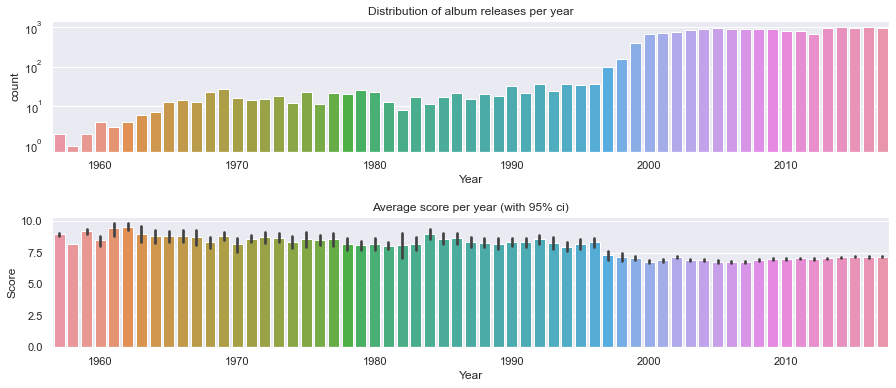

In [201]:
fig, axs = plt.subplots(2, 
                        figsize=(15,6), 
                        gridspec_kw={"hspace": 0.5}, # increases vertical spacing a bit
                        sharex=False)

# Plot distribution of album release years
ax = axs[0]
ax = sns.countplot(data=df_pitchfork, x='releaseyear_notutc',  ax=ax)
ax.set(title='Distribution of album releases per year', xlabel='Year')
ax.set_yscale("log") # log scale!

# fixes the x-axis!
ax.xaxis.set_major_formatter(lambda x, pos: str(int(x) + 1957))
ax.set_xticks([3, 13, 23, 33, 43, 53])
ax.tick_params(axis='x', rotation=0)

ax = axs[1]
#sns.barplot plots mean of the data by default
ax = sns.barplot(data = df_pitchfork, x='releaseyear_notutc', y='score', ci=95, ax=ax) 
ax.xaxis.set_major_formatter(lambda x, pos: str(int(x) + 1957))

# fixes the x-axis!
ax.set_xticks([3, 13, 23, 33, 43, 53])
ax.set(title='Average score per year (with 95% ci)', xlabel='Year', ylabel='Score')
ax.tick_params(axis='x', rotation=0)

plt.show()

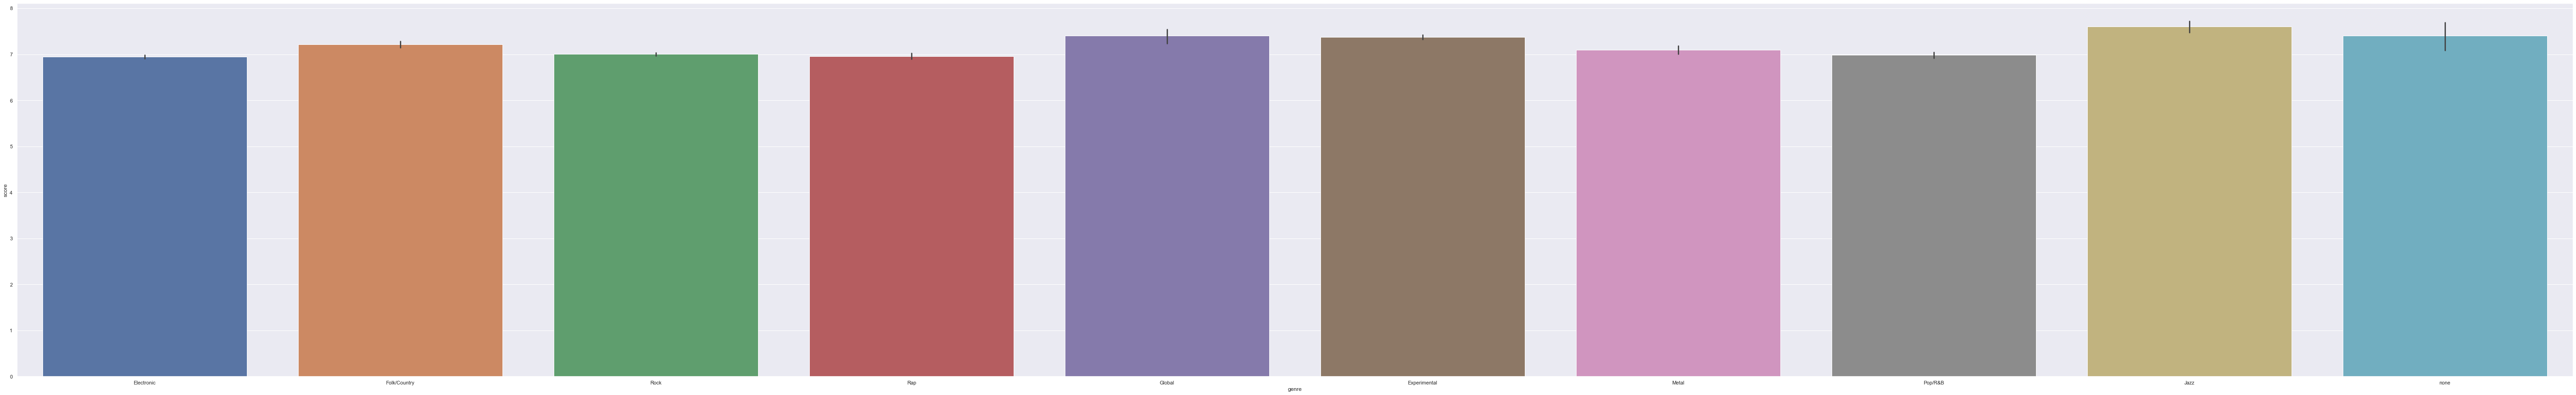

In [216]:
#sns.barplot plots mean of the data by default
sns.barplot(data = df_pitchfork, x='genre', y='score', ci=95) 
#ax.xaxis.set_major_formatter(lambda x, pos: str(int(x) + 1957))
ax.set(title='Average score by genre (with 95% ci)', xlabel='Genre', ylabel='Score')
ax.tick_params(axis='x', rotation=0)
plt.show()


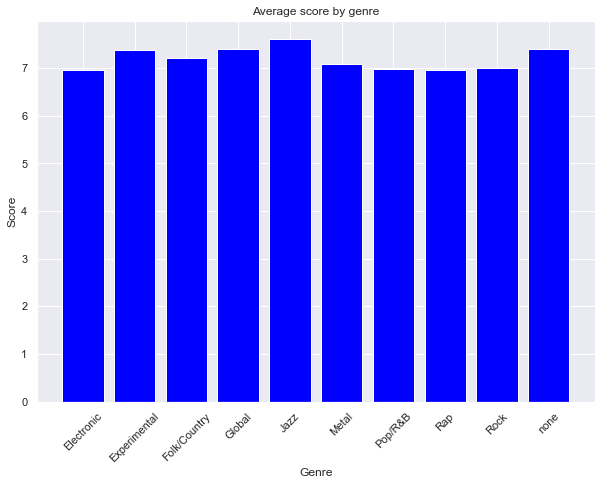

In [232]:
# Figure Size
fig = plt.figure(figsize =(10, 7))

# assign coordinates
x = df_pitchfork.groupby('genre').score.mean().index
y = df_pitchfork.groupby('genre').score.mean()

ax = plt.axes()
  
# depict illustration
plt.bar(x, y, color="blue")
  
# setting ticks for x-axis
#ax.set_xticks([2, 4, 6, 8, 10])
# setting ticks for y-axis
#ax.set_yticks([1, 3, 5, 7, 9])
plt.set_yticks = np.arange(0, 10, 1)
plt.xticks(rotation=45)
plt.xlabel("Genre")
plt.ylabel("Score")
plt.title("Average score by genre")
plt.show()

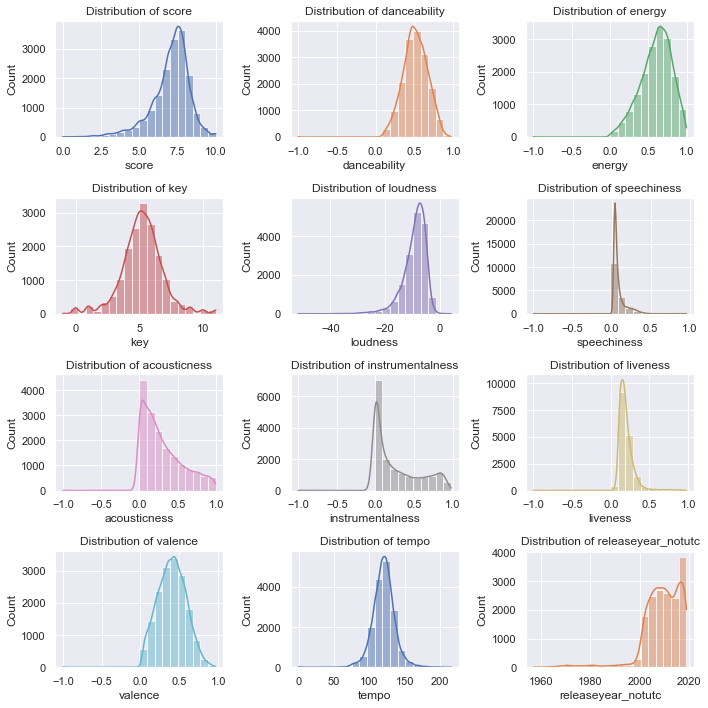

,count,mean,std,min,25%,50%,75%,max
score,16738.0,7.048596,1.247027,0.00000,6.500000,7.300000,7.800000,10.000
danceability,16738.0,0.512334,0.158859,-1.00000,0.408900,0.511348,0.622625,0.974
energy,16738.0,0.601276,0.203196,-1.00000,0.474000,0.624722,0.749714,0.999
key,16738.0,5.216501,1.613841,-1.00000,4.333333,5.230769,6.100000,11.000
loudness,16738.0,-9.283268,4.238371,-51.72875,-11.217535,-8.444263,-6.392496,4.078
speechiness,16738.0,0.090742,0.090126,-1.00000,0.040633,0.056665,0.100211,0.958
acousticness,16738.0,0.301914,0.262392,-1.00000,0.091104,0.228844,0.460500,0.996
instrumentalness,16738.0,0.274748,0.298907,-1.00000,0.009597,0.149363,0.497283,0.982
liveness,16738.0,0.196402,0.104933,-1.00000,0.134517,0.174261,0.228338,0.978
valence,16738.0,0.405268,0.182293,-1.00000,0.274267,0.406288,0.531720,0.971


In [236]:
# 1.3

numeric_cols = df_pitchfork.select_dtypes(include=['int64','float64']).columns

# nice plot!
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(10,10))
for i,(col,ax) in enumerate(zip(numeric_cols, axs.flatten())):
    sns.histplot(data=df_pitchfork[col],ax=ax, bins=20, kde=True, color=f'C{i}')
    ax.set(title=f'Distribution of {col}')
    
plt.tight_layout()
plt.show()

# nice table! # .T means to transpose
df_pitchfork.describe().T

<b>Empirical CDF (ECDF)</b>

In [ ]:
# 4.1

print(df.groupby("condition").update_average.agg([np.mean, np.std]))
sns.ecdfplot(df[df["condition"] == "Sign Top"].update_average, label="Sign Top")
sns.ecdfplot(df[df["condition"] == "Sign Bottom"].update_average, label="Sign Bottom")
plt.legend()
plt.title("Empirical CDF plot")
plt.xscale("log")

<b>error curve</b>

In [ ]:
fig = plt.figure(figsize =(10, 7))

x =[1, 2, 3, 4]
y = trend_curve.Mean

y_error = trend_curve.STD

plt.xlabel("Year")
plt.ylabel("Number of quotes")
plt.title('Annual average number of quotes relevant to anxious depression words in 2015, 2017, 2018 & 2019')

x_ticks = ['2015', '2017', '2018', '2019']
plt.xticks(x, x_ticks)

# ploting graph
plt.plot(x,y)
plt.errorbar(x, y, yerr = y_error, fmt ='-bo')


plt.savefig('Trend of anxiety quotes in 2015, 2017, 2018 & 2019')

<b>Multiple Variable Plots</b>

In [252]:
baseball

,id,player,year,stint,team,lg,g,ab,r,h,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
0,88641,womacto01,2006,2,CHN,NL,19,50,6,14,...,2,1,1,4,4,0,0,3,0,0
1,88643,schilcu01,2006,1,BOS,AL,31,2,0,1,...,0,0,0,0,1,0,0,0,0,0
2,88645,myersmi01,2006,1,NYA,AL,62,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,88649,helliri01,2006,1,MIL,NL,20,3,0,0,...,0,0,0,0,2,0,0,0,0,0
4,88650,johnsra05,2006,1,NYA,AL,33,6,0,1,...,0,0,0,0,4,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,89525,benitar01,2007,2,FLO,NL,34,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,89526,benitar01,2007,1,SFN,NL,19,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,89530,ausmubr01,2007,1,HOU,NL,117,349,38,82,...,25,6,1,37,74,3,6,4,1,11
98,89533,aloumo01,2007,1,NYN,NL,87,328,51,112,...,49,3,0,27,30,5,2,0,3,13


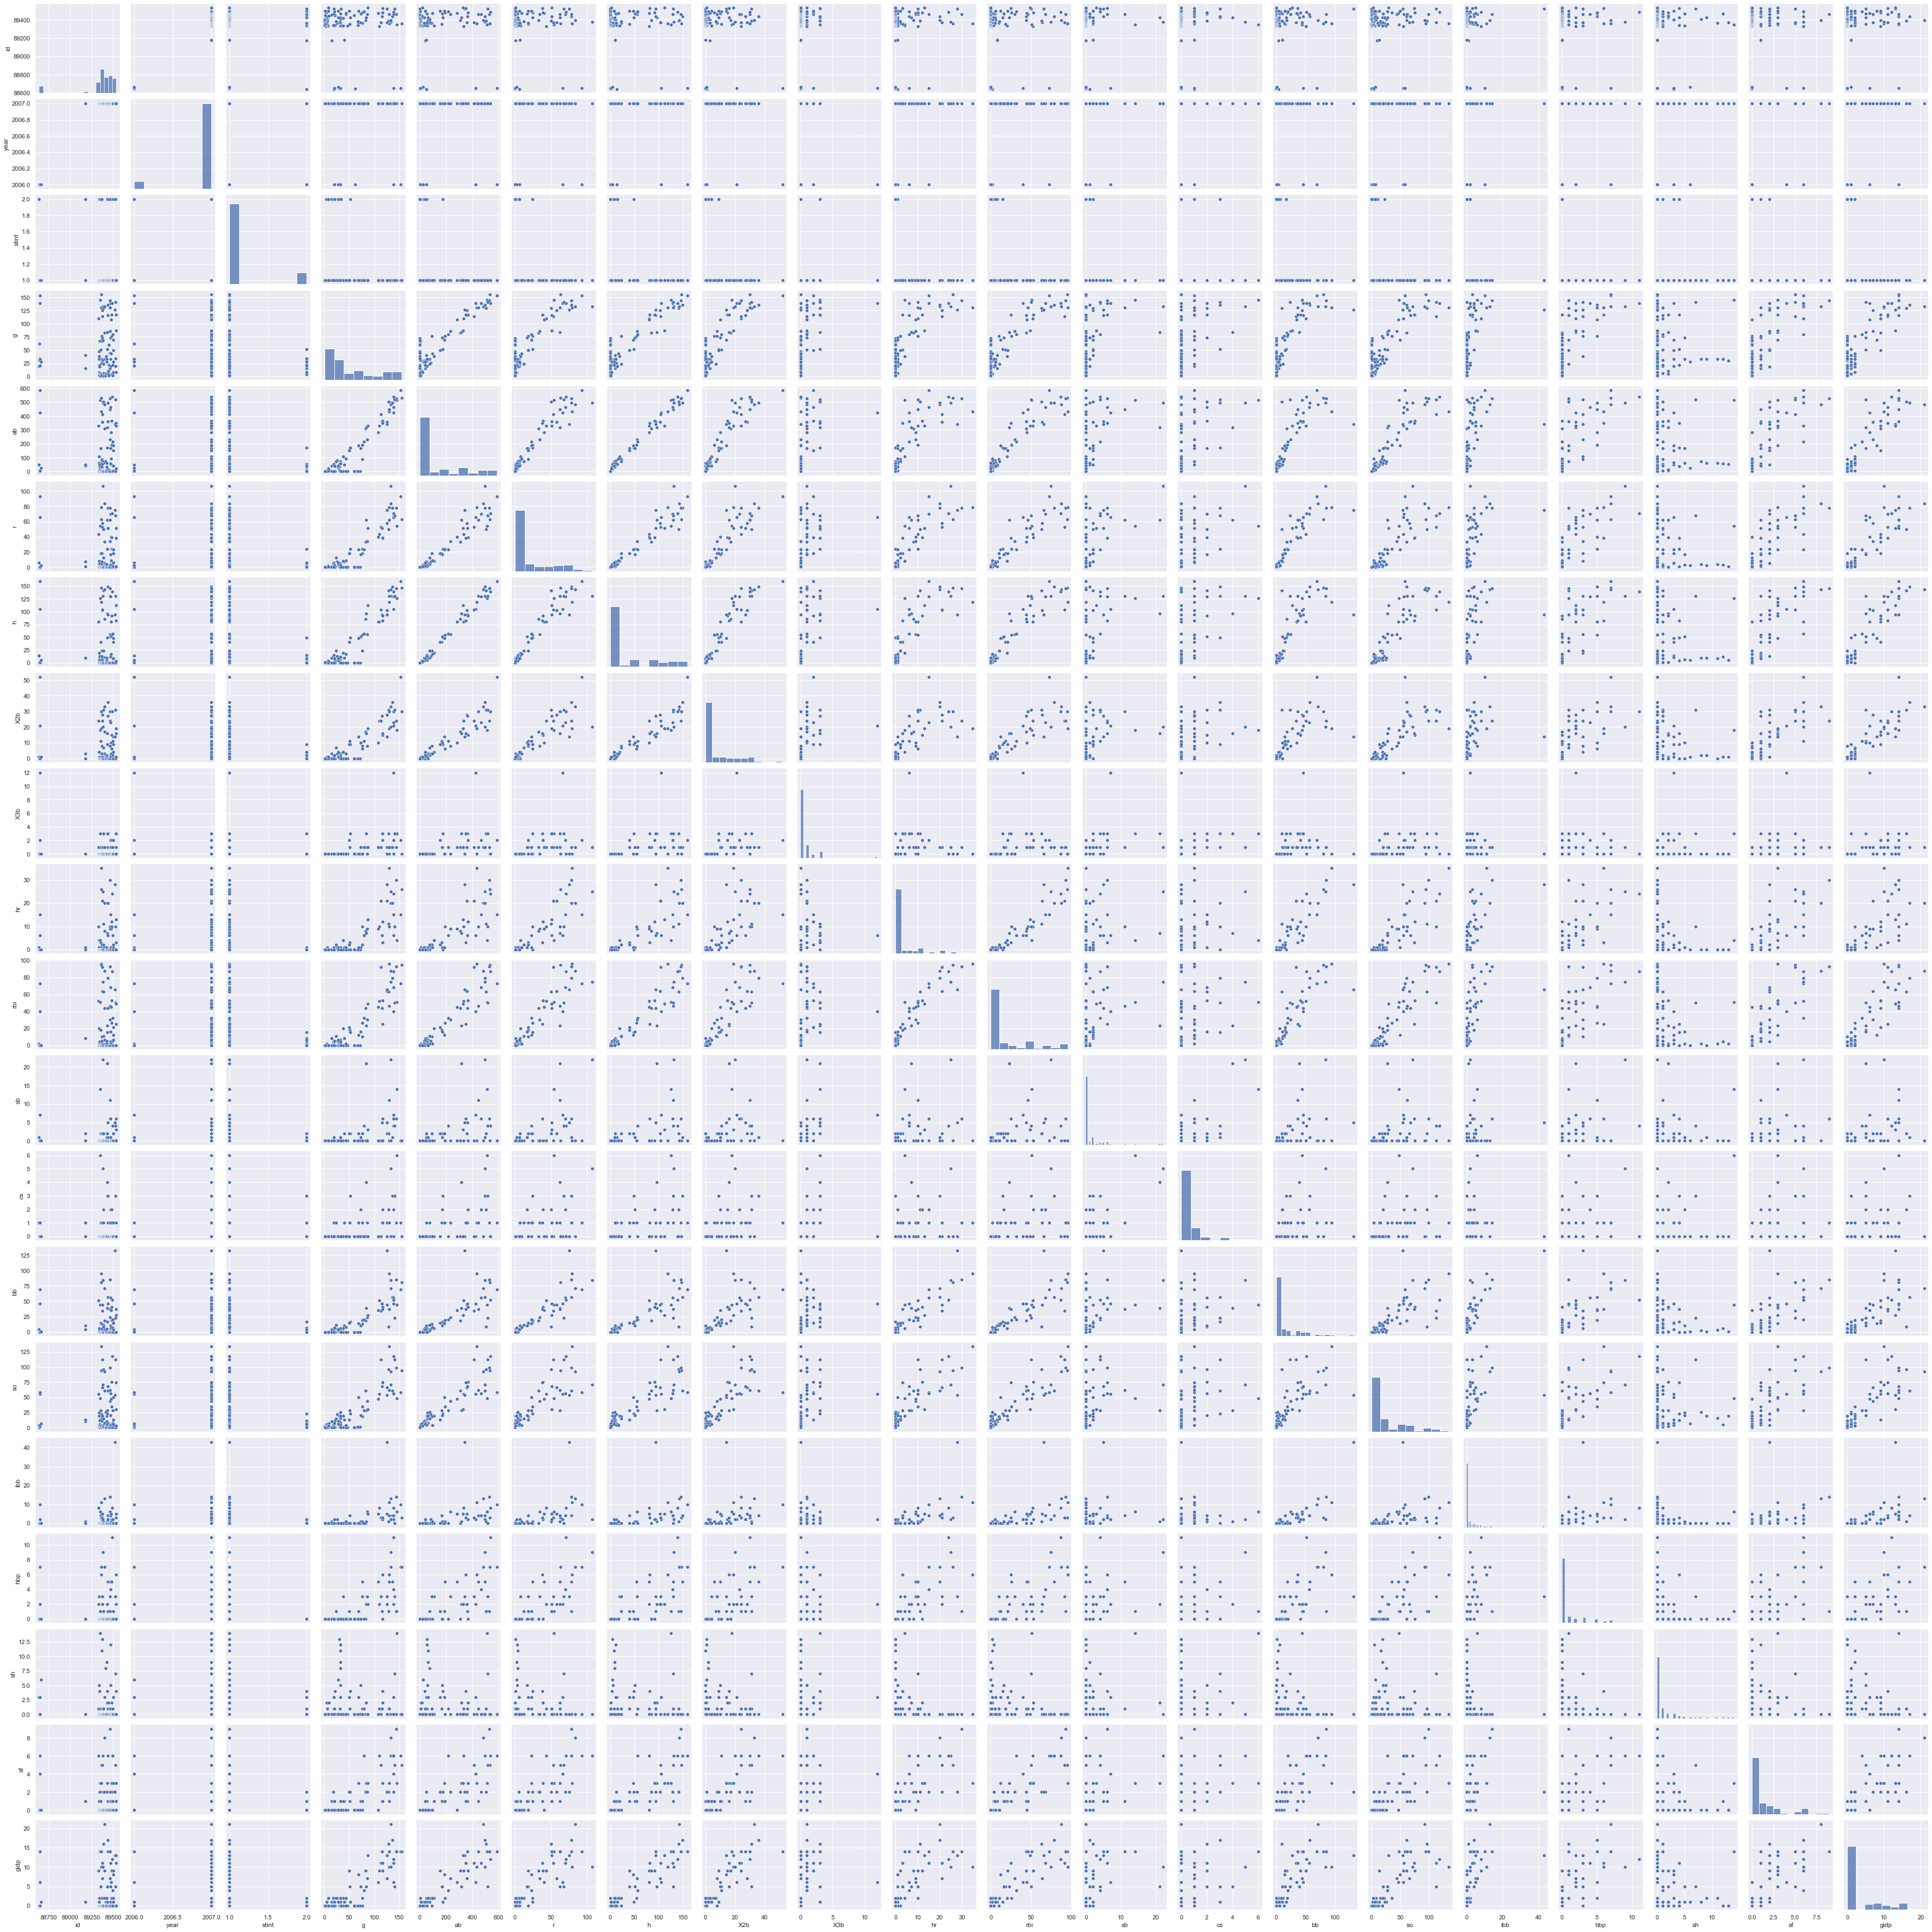

In [253]:
sns.pairplot(baseball)

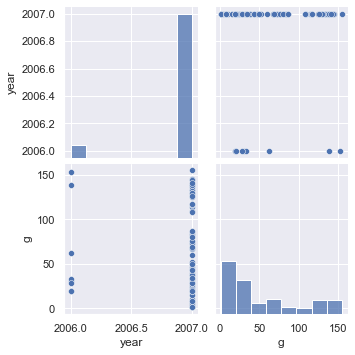

In [254]:
sns.pairplot(baseball[['year','g']])

### Prepare some statistical models

In [ ]:
# Statistical significance
stats.ttest_ind(df[df["condition"] == "Sign Top"].update_average, 
                df[df["condition"] == "Sign Bottom"].update_average)

In [ ]:
stats.pearsonr(df['IncomePerCap'],df['Employed'])

- There is a small (0.26), but significant (p < 0.05) positive correlation

In [ ]:
stats.spearmanr(df['IncomePerCap'],df['Employed'])

- Spearman rank coorrelation is also significant(p<0.05), and slightly higher(0.30)

- There is a small (0.26), but significant (p < 0.05) positive correlation### Prepare some machine learning package

In [ ]:
stats.ttest_ind(df.loc[df['State'] == 'New York']['IncomePerCap'], df.loc[df['State'] == 'California']['IncomePerCap'])

In [ ]:
# Declares the model of ordinary least squares linear regression (OLS)
mod = smf.ols(formula='time ~ C(diabetes) + C(high_blood_pressure)', data=df)

In [ ]:
# logit is logistic regression. The other parameters are the same as before

mod = smf.logit(formula='DEATH_EVENT ~  age + creatinine_phosphokinase + ejection_fraction + \
                        platelets + serum_creatinine + serum_sodium + \
                        C(diabetes) + C(high_blood_pressure) +\
                        C(sex) + C(anaemia) + C(smoking) + C(high_blood_pressure)', data=df)
res = mod.fit()
print(res.summary())

In [ ]:
# Fits the model (find the optimal coefficients, adding a random seed ensures consistency)
np.random.seed(2)
res = mod.fit()

In [ ]:
# Print thes summary output provided by the library.
print(res.summary())

### Prepare some linear algebra package

In [ ]:
# Define x as the features 
# Extract feature columns "releaseyear",  "key", "acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "valence", "tempo" and the one-hot encoded genre-related columns. 
feature_cols_linear = ['releaseyear', 'key', 'acousticness', 
                        'danceability', 'energy', 'instrumentalness',
                        'liveness', 'loudness', 'speechiness', 
                        'valence', 'tempo', 'Electronic_onehot', 
                        'Experimental_onehot', 'Folk/Country_onehot',
                        'Global_onehot', 'Jazz_onehot', 'Metal_onehot',
                        'Other_onehot', 'Pop/R&B_onehot', 'Rap_onehot', 'Rock_onehot']

X_linear = df[feature_cols_linear].to_numpy()

# Define y as the predict outcome
y_linear = df.score.to_numpy()

# Use a 70/30 train-test split and fit with training set
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X_linear, y_linear, test_size=0.3, random_state=123)

model = LinearRegression()
model.fit(X_train_linear, y_train_linear)

# Evaluate with testing set. Score returns the coefficient of determination (R^2)
y_pred = model.predict(X_test_linear)

r2 = r2_score(y_test_linear,y_pred)

# Print R2
print("R2 score for the testing set:", r2)


### Prepare some NLP package 

### Prepare some Machine Leanring Package

In [255]:
data = pd.read_csv('./data_W1/Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [258]:
feature_cols = ['TV', 'radio', 'newspaper']
X = data[feature_cols]
y = data.sales

X.describe()

,TV,radio,newspaper
count,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000
std,85.854236,14.846809,21.778621
min,0.700000,0.000000,0.300000
25%,74.375000,9.975000,12.750000
50%,149.750000,22.900000,25.750000
75%,218.825000,36.525000,45.100000
max,296.400000,49.600000,114.000000


In [259]:
lin_reg = LinearRegression()  # create the model
lin_reg.fit(X, y)  # train it

LinearRegression()

In [260]:
for f in range(len(feature_cols)):
    print("{0} * {1} + ".format(lin_reg.coef_[f], feature_cols[f]))
print(lin_reg.intercept_)

0.045764645455397615 * TV + 
0.18853001691820456 * radio + 
-0.0010374930424763272 * newspaper + 
2.9388893694594085


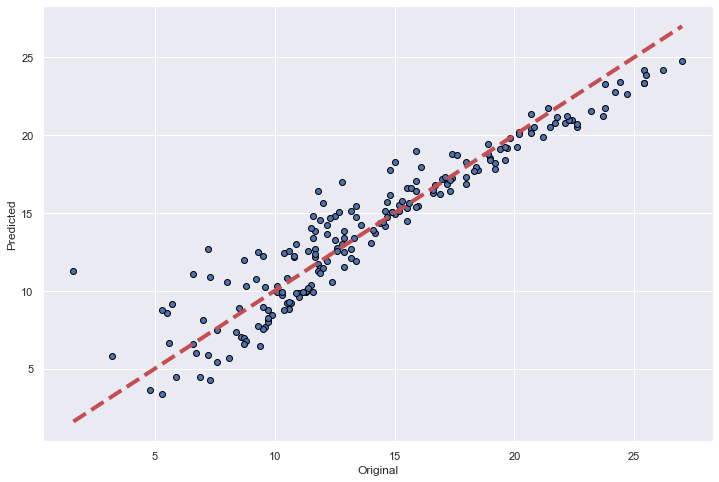

In [262]:

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
lr = LinearRegression()

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, X, y, cv=5)

# Plot the results
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([min(y), max(y)], [min(y), max(y)], 'r--', lw=4)
ax.set_xlabel('Original')
ax.set_ylabel('Predicted')
plt.show()

In [249]:

pitchfork = pd.read_csv('data_HW2/pitchfork.csv.gz')
pitchfork = pitchfork.drop_duplicates(subset=["album", "artist"], keep="first")
pitchfork['reviewdate'] = pd.to_datetime(pitchfork['reviewdate'], format='%B %d %Y')
pitchfork['releaseyear'] = pd.to_datetime(pitchfork['releaseyear'], format='%Y')
pitchfork['releaseyear_notutc'] = pitchfork.releaseyear.dt.year

# artists with more than 1 album
filtered_artists = pitchfork.groupby('artist').size().loc[lambda x : x > 1].index
tt=pitchfork.groupby('artist').size()
tt2=pitchfork.groupby('artist').size().loc[lambda x : x > 1]

# copying so we don't accidentally modify original df
two_ormore = pitchfork[pitchfork.artist.isin(filtered_artists)].copy()

In [251]:
display(tt, '\n')
display(tt2)

artist
 Gia Margaret                                    1
 JPEGMAFIA                                       1
!!!                                              8
(Sandy) Alex G                                   2
...And You Will Know Us by the Trail of Dead    11
                                                ..
Âme                                              2
Çaykh                                            1
Ólafur Arnalds                                   4
Ólöf Arnalds                                     1
тпсб                                             1
Length: 7892, dtype: int64

'\n'

artist
!!!                                              8
(Sandy) Alex G                                   2
...And You Will Know Us by the Trail of Dead    11
03 Greedo                                        4
13 & God                                         2
                                                ..
yMusic                                           2
¡Forward, Russia!                                2
µ-Ziq                                            4
Âme                                              2
Ólafur Arnalds                                   4
Length: 3564, dtype: int64

### Prepare for all machine learning scores 

In [263]:
def compute_confusion_matrix(true_label, prediction_proba, decision_threshold=0.5): 
    
    predict_label = (prediction_proba[:,1]>decision_threshold).astype(int)   
                                                                                                                       
    TP = np.sum(np.logical_and(predict_label==1, true_label==1))
    TN = np.sum(np.logical_and(predict_label==0, true_label==0))
    FP = np.sum(np.logical_and(predict_label==1, true_label==0))
    FN = np.sum(np.logical_and(predict_label==0, true_label==1))
    
    confusion_matrix = np.asarray([[TP, FP],
                                    [FN, TN]])
    return confusion_matrix


def plot_confusion_matrix(confusion_matrix):
    [[TP, FP],[FN, TN]] = confusion_matrix
    label = np.asarray([['TP {}'.format(TP), 'FP {}'.format(FP)],
                        ['FN {}'.format(FN), 'TN {}'.format(TN)]])
    
    df_cm = pd.DataFrame(confusion_matrix, index=['Yes', 'No'], columns=['Positive', 'Negative']) 
    
    return sn.heatmap(df_cm, cmap='YlOrRd', annot=label, annot_kws={"size": 16}, cbar=False, fmt='')


def compute_all_score(confusion_matrix, t=0.5):
    [[TP, FP],[FN, TN]] = confusion_matrix.astype(float)
    
    accuracy =  (TP+TN)/np.sum(confusion_matrix)
    
    precision_positive = TP/(TP+FP) if (TP+FP) !=0 else np.nan
    precision_negative = TN/(TN+FN) if (TN+FN) !=0 else np.nan
    
    recall_positive = TP/(TP+FN) if (TP+FN) !=0 else np.nan
    recall_negative = TN/(TN+FP) if (TN+FP) !=0 else np.nan

    F1_score_positive = 2 *(precision_positive*recall_positive)/(precision_positive+recall_positive) if (precision_positive+recall_positive) !=0 else np.nan
    F1_score_negative = 2 *(precision_negative*recall_negative)/(precision_negative+recall_negative) if (precision_negative+recall_negative) !=0 else np.nan

    return [t, accuracy, precision_positive, recall_positive, F1_score_positive, precision_negative, recall_negative, F1_score_negative]

make_blobs to generate machine learning dataset

In [266]:
from sklearn.datasets import make_blobs, make_moons
total_samples = 100
top_secret_number = random.randint(2, 10)

# This create some artifical clusters with standard dev. = 3
X10d, _ = make_blobs(n_samples=total_samples, 
                           centers=top_secret_number, 
                           cluster_std=3,
                           n_features=10,
                           random_state=0)

print("The features of the first sample are: %s" % X10d[0])

The features of the first sample are: [10.24793758 -1.73637947 12.45282913  8.49851514  6.00451807 -9.79577426
 -2.07663988 -9.21346669 -6.32626708 -7.52701938]


t-SNE, PCA to reduce the dimensionality of the model

In [268]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
X_reduced_tsne = TSNE(n_components=2, random_state=0).fit_transform(X10d)

print("The features of the first sample are: %s" % X_reduced_tsne[0])


The features of the first sample are: [-4.535549 -9.552518]


Text(0, 0.5, 'Feature 2')

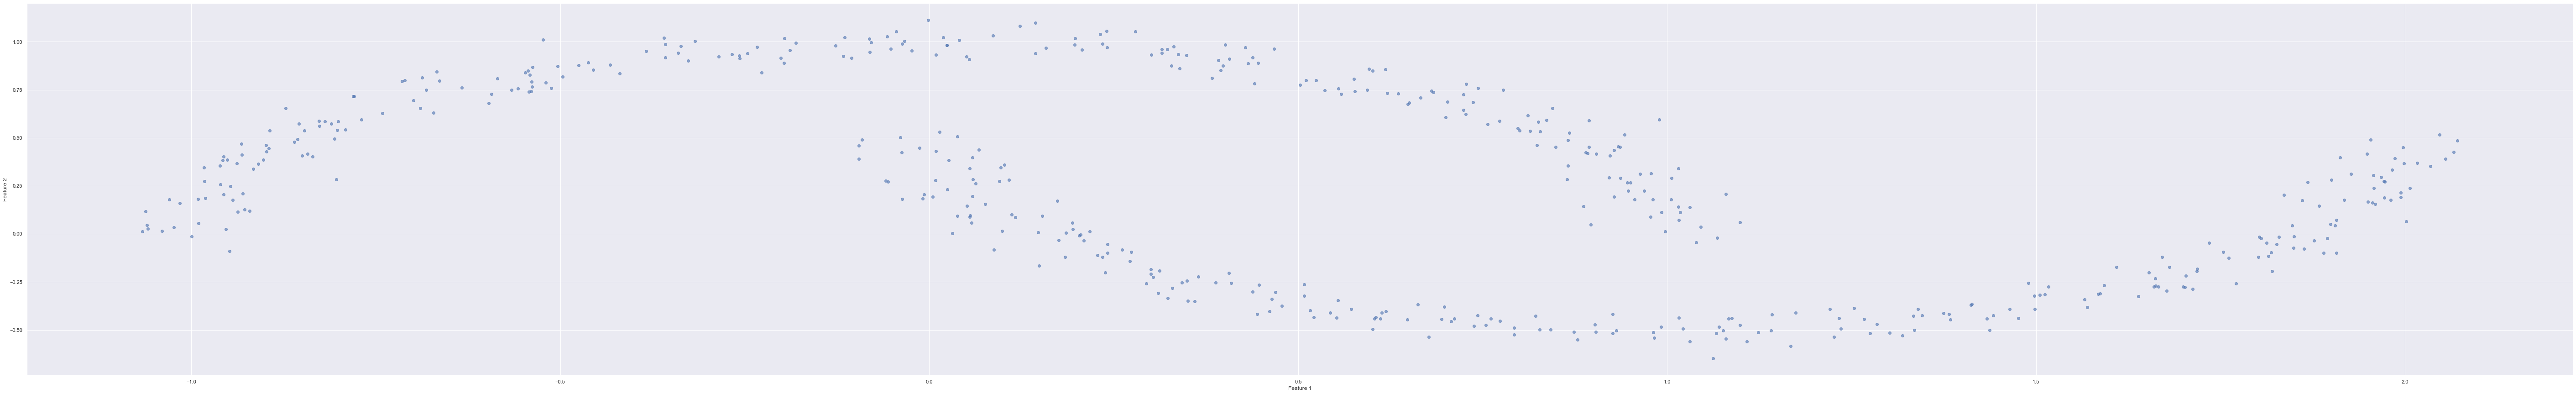

In [269]:
# Create 500 random points with 2-moons shape
X_moons, _ = make_moons(500, noise=0.05, random_state=0)

plt.scatter(X_moons[:,0], X_moons[:,1], alpha=0.6)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")